In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
filenames = ["icecube_10year_ps/events/IC40_exp.csv", "icecube_10year_ps/irfs/IC59_smearing.csv",
 "icecube_10year_ps/irfs/IC79_smearing.csv", "icecube_10year_ps/irfs/IC86_I_smearing.csv", "icecube_10year_ps/irfs/IC86_II_smearing.csv"]

file = filenames[0]

In [29]:
 with open(file, 'r') as f2:
    lines = f2.readlines()
    content=[]
    column=lines[0].split()
    column.pop(0)
    for line in lines[1:]:
        
        content.append(line.split())


    smear = pd.DataFrame(content, columns = column)
    f2.close()
smear


,MJD[days],log10(E/GeV),AngErr[deg],RA[deg],Dec[deg],Azimuth[deg],Zenith[deg]
0,54562.37911273,3.31,0.48,203.024,16.760,218.374,106.712
1,54562.38662244,5.17,0.62,75.024,-13.371,349.100,76.646
2,54562.38789162,3.92,0.56,97.501,11.290,327.060,101.291
3,54562.39267689,5.57,1.13,305.857,-33.932,120.413,56.090
4,54562.40477593,5.80,1.11,143.516,-38.279,287.171,51.684
...,...,...,...,...,...,...,...
36895,54971.09334025,5.75,0.37,73.630,-52.158,287.805,37.860
36896,54971.11327962,3.30,0.51,256.797,59.915,111.842,149.895
36897,54971.11761737,5.89,0.61,122.087,-69.891,248.182,20.077
36898,54971.12056419,3.29,0.87,238.257,34.325,132.951,124.290


In [32]:
#    dloge = [float(smear['log10(E_nu/GeV)_max'][i]) -float((smear['log10(E_nu/GeV)_min'][i])) for i in range(0,len(smear['log10(E_nu/GeV)_max']))]
#    de = [pow(10,float(smear['log10(E_nu/GeV)_max'][i])) - pow(10,float((smear['log10(E_nu/GeV)_min'][i]))) for i in range(0,len(smear['log10(E_nu/GeV)_max']))]
e = [float(smear['log10(E/GeV)'][i]) for i in range(0,len(smear['log10(E/GeV)']))]
    #print(e)

e = [((pow(10,float(smear['log10(E_nu/GeV)_max'][i])) + pow(10,float((smear['log10(E_nu/GeV)_min'][i]))))/2.0) for i in range(0,len(smear['log10(E_nu/GeV)_max']))]
#print(e)

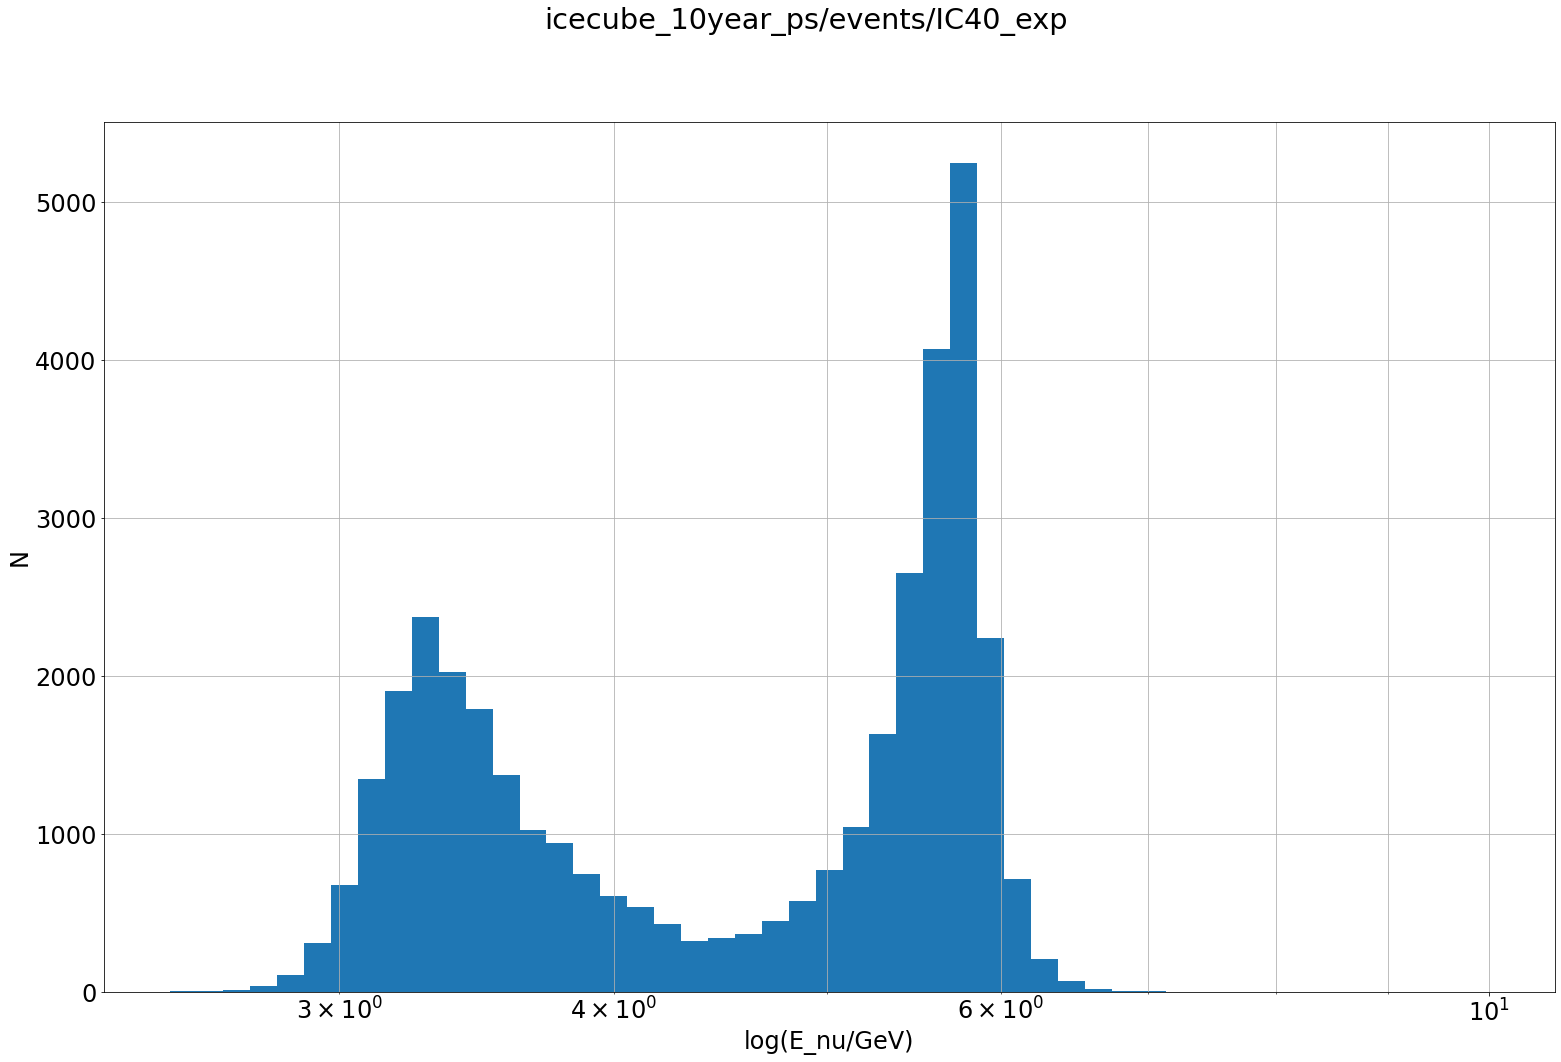

In [45]:
plt.figure(figsize=(26,16))
plt.rcParams.update({'font.size': 24})
plt.hist(e, bins= np.logspace(0.4,1))
#plt.plot(e)
plt.xscale("log")
plt.xlabel("log(E_nu/GeV)")
plt.ylabel("N")
plt.suptitle(file.replace('icecube_10year_ps/irfs/','').replace('_smearing','').replace('.csv',''))
plt.grid(True, which="both")
#plt.plot
plt.show()